In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_15084/2057046489.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2010-01-01')
[*********************100%***********************]  1 of 1 completed


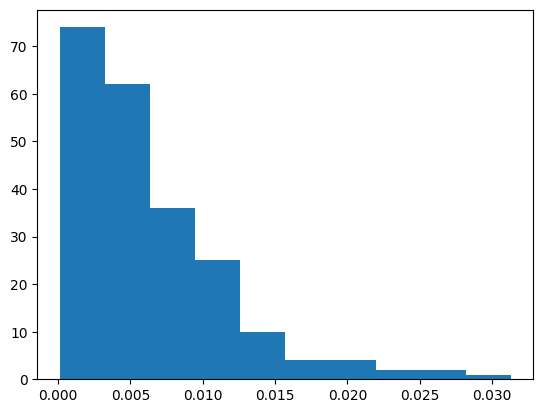

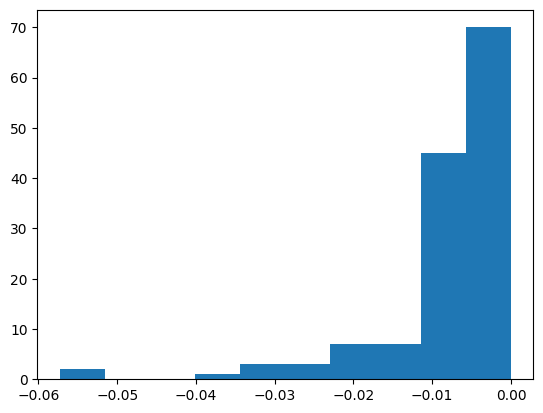

In [ ]:
TICKER = 'SPY'
LOOKBACK = 1000
HOLDING_PERIOD = 5

def get_data(ticker=TICKER):
    df=yf.download(ticker,start='2010-01-01')
    df.columns = df.columns.get_level_values(0)
    
    #only return the usbset of data interested in
    return df.iloc[-LOOKBACK:,:]

def bull_fvg(df):

    df['High_2prev'] = df['High'].shift(2)
    df['Bull_FVG'] = (df['Low'] > df['High_2prev']).astype(int)
    df['Bull_FVG_Val'] = (df['Low'] - df['High_2prev']) * df['Bull_FVG'] / df['Close']

    fvg_subset = df[df['Bull_FVG_Val'] > 0]

    plt.hist(fvg_subset['Bull_FVG_Val'], bins=10)
    plt.title('Bullish Fair Value Gap Values')

    return df

def bear_fvg(df):

    df['Low_2prev'] = df['Low'].shift(2)
    df['Bear_FVG'] = (df['High'] < df['Low_2prev']).astype(int)
    df['Bear_FVG_Val'] = (df['High'] - df['Low_2prev']) * df['Bear_FVG'] / df['Close']

    fvg_subset = df[df['Bear_FVG_Val'] < 0]

    plt.figure()
    plt.hist(fvg_subset['Bear_FVG_Val'], bins=10)
    plt.title('Bearish Fair Value Gap Values')

    return df

def assess_bull_FVG(df, holding_period=HOLDING_PERIOD):

    #5 day holding period returns
    df[f'Returns_In_{holding_period}_Periods'] = df['Close'].shift(-holding_period) / df['Close']
    
    fvg_subset = df[df['Bull_FVG_Val'] > 0]
    print(f'{len(fvg_subset)} Bullish FVGs')
    print(f'Bull FVG {holding_period} Period Average returns: {round((fvg_subset[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    win_rate = (fvg_subset[f'Returns_In_{holding_period}_Periods'] < 1).mean() * 100
    print(f'Bull FVG Win Rate: {round(win_rate, 2)}%')

    # define quantiles
    lower = fvg_subset['Bull_FVG_Val'].quantile(.25)
    upper = fvg_subset['Bull_FVG_Val'].quantile(.75)

    # subset
    fvg_medium_val = fvg_subset[
        (fvg_subset['Bull_FVG_Val'] >= lower) & (fvg_subset['Bull_FVG_Val'] <= upper)
    ]
    print(f'{len(fvg_medium_val)} Medium Sized Bullish FVGs')
    print(f'Medium Bull FVG {holding_period} Period Average returns: {round((fvg_medium_val[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    win_rate_medium = (fvg_medium_val[f'Returns_In_{holding_period}_Periods'] < 1).mean() * 100
    print(f'Medium Bull FVG Win Rate: {round(win_rate_medium, 2)}%')

    return df

def assess_bear_FVG(df, holding_period=HOLDING_PERIOD):

    #5 day holding period returns
    df[f'Returns_In_{holding_period}_Periods'] = df['Close'].shift(-holding_period) / df['Close']
    
    fvg_subset = df[df['Bear_FVG_Val'] < 0]
    print(f'{len(fvg_subset)} Bearish FVGS')
    print(f'Bear FVG {holding_period} Period Average returns: {round((fvg_subset[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    win_rate = (fvg_subset[f'Returns_In_{holding_period}_Periods'] > 1).mean() * 100
    print(f'Bear FVG Win Rate: {round(win_rate, 2)}%')


    # define quantiles
    lower = fvg_subset['Bear_FVG_Val'].quantile(.25)
    upper = fvg_subset['Bear_FVG_Val'].quantile(.75)

    # subset
    fvg_medium_val = fvg_subset[
        (fvg_subset['Bear_FVG_Val'] >= lower) & (fvg_subset['Bear_FVG_Val'] <= upper)
    ]
    print(f'{len(fvg_medium_val)} Medium Sized Bearish FVGs')
    print(f'Medium Bear FVG {holding_period} Period Average returns: {round((fvg_medium_val[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    win_rate_medium = (fvg_medium_val[f'Returns_In_{holding_period}_Periods'] > 1).mean() * 100
    print(f'Medium Bull FVG Win Rate: {round(win_rate_medium, 2)}%')

    return df

def main():
    df = get_data()
    df = bull_fvg(df)
    df = bear_fvg(df)
    df = assess_bull_FVG(df)
    df = assess_bear_FVG(df)

    return df

df = main()
    

In [16]:
def assess_bull_FVG(df, holding_period=HOLDING_PERIOD):
    
    #5 day holding period returns
    df[f'Price_{holding_period}P_Ago'] = df['Close'].shift(-holding_period) / df['Close']
    fvg_subset = df[df['Bull_FVG_Val'] > 0]
    
    print(f'{len(fvg_subset)} trades taken')
    
    return fvg_subset[f'Price_{holding_period}P_Ago'].mean() 

def assess_bear_FVG(df, holding_period=HOLDING_PERIOD):
    
    #5 day holding period returns
    df[f'Price_{holding_period}P_Ago'] = df['Close'].shift(-holding_period) / df['Close']
    fvg_subset = df[df['Bear_FVG_Val'] < 0]
    
    print(f'{len(fvg_subset)} trades taken')
    
    return fvg_subset[f'Price_{holding_period}P_Ago'].mean() 

assess_bull_FVG(df)
assess_bear_FVG(df)
    

220 trades taken
138 trades taken


np.float64(1.0024665455940414)

(array([74., 62., 37., 25., 11.,  4.,  4.,  2.,  2.,  1.]),
 array([5.53784424e-08, 3.12920541e-03, 6.25835544e-03, 9.38750548e-03,
        1.25166555e-02, 1.56458055e-02, 1.87749556e-02, 2.19041056e-02,
        2.50332556e-02, 2.81624057e-02, 3.12915557e-02]),
 <BarContainer object of 10 artists>)

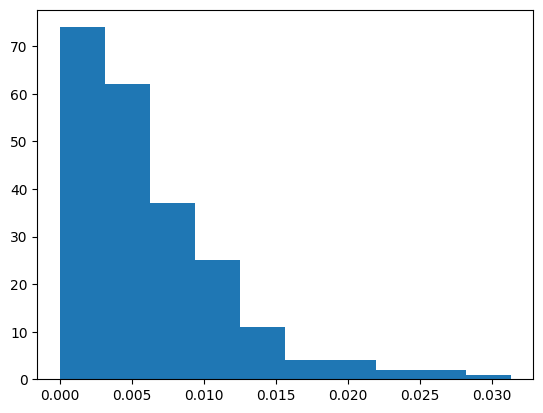

In [10]:
FVGs = df[df['Bull_FVG_Val'] > 0]
plt.hist(FVGs['Bull_FVG_Val'], bins = 10)